# Milk Quality Prediction (Classification)

# About Dataset
This dataset is manually collected from observations. It helps us to build machine learning models to predict the quality of milk.
This dataset consists of 7 independent variables ie pH, Temperature, Taste, Odor, Fat, Turbidity, and Color.
Generally, the Grade or Quality of the milk depends on these parameters. These parameters play a vital role in the predictive analysis of the milk.

# Usage
The target variable is nothing but the Grade of the milk. It can be

# Target

Low (Bad)

Medium (Moderate)

High (Good)

If Taste, Odor, Fat, and Turbidity are satisfied with optimal conditions then they will assign 1 otherwise 0.
Temperature and ph are given their actual values in the dataset.

We have to perform data preprocessing, and data augmentation techniques to build statistical and predictive models to predict the quality of the milk.

# Inspiration
To leverage the benefits of machine learning in the dairy industry.

# import libararies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
df = pd.read_csv('milknew.new.csv')
df

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium
...,...,...,...,...,...,...,...,...
1054,6.7,45,1,1,0,0,247,medium
1055,6.7,38,1,0,1,0,255,high
1056,3.0,40,1,1,1,1,255,low
1057,6.8,43,1,0,1,0,250,high


In [3]:
df.shape

(1059, 8)

In [4]:
df.describe()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000


In [5]:
df.dtypes

pH            float64
Temprature      int64
Taste           int64
Odor            int64
Fat             int64
Turbidity       int64
Colour          int64
Grade          object
dtype: object

# DATA CLEANING

In [6]:
df[df.duplicated()]

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
35,6.8,45,0,1,1,1,255,high
48,9.5,34,1,1,0,1,255,low
50,6.6,37,1,1,1,1,255,high
51,5.5,45,1,0,1,1,250,low
52,4.5,60,0,1,1,1,250,low
...,...,...,...,...,...,...,...,...
1054,6.7,45,1,1,0,0,247,medium
1055,6.7,38,1,0,1,0,255,high
1056,3.0,40,1,1,1,1,255,low
1057,6.8,43,1,0,1,0,250,high


In [7]:
Data = df.drop_duplicates()
Data

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium
...,...,...,...,...,...,...,...,...
930,6.6,38,0,1,1,1,255,high
942,6.6,45,1,0,0,1,255,medium
957,6.8,41,1,1,1,0,255,high
985,6.5,45,1,0,0,0,246,medium


In [8]:
1059-976

83

In [9]:
Data.isnull().sum()

pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64

In [10]:
Data.groupby('Grade').mean().T

Grade,high,low,medium
pH,6.665217,6.726923,6.626471
Temprature,39.913043,51.500000,40.294118
Taste,0.695652,0.500000,0.352941
Odor,0.695652,0.461538,0.147059
Fat,0.956522,0.653846,0.323529
Turbidity,0.608696,0.615385,0.176471
Colour,252.739130,251.615385,250.117647


In [11]:
x = Data['Grade'].value_counts().to_frame()
print(x)

        count
Grade        
medium     34
low        26
high       23


In [12]:
  df_x = pd.DataFrame(x)
df_x = df_x.reset_index()

df_x

,Grade,count
0,medium,34
1,low,26
2,high,23


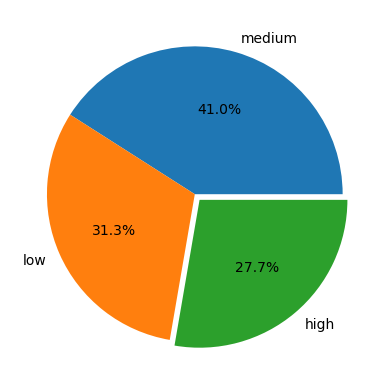

In [13]:
plt.pie(df_x['count'], labels=df_x['Grade'], explode=[0,0,0.05 ],autopct='%0.1f%%', wedgeprops={'linewidth':5}, )
plt.show()

In [14]:
df = Data.pH.unique()
df

array([6.6, 8.5, 9.5, 5.5, 4.5, 8.1, 6.7, 5.6, 8.6, 7.4, 6.8, 6.5, 4.7,
       3. , 9. , 6.4])

In [15]:
for i in Data.columns:
    print(Data[i].value_counts())
    print()
    print()
    

pH
6.6    25
6.8    19
6.5    16
6.7     5
8.5     2
4.5     2
8.6     2
7.4     2
3.0     2
9.0     2
9.5     1
5.5     1
8.1     1
5.6     1
4.7     1
6.4     1
Name: count, dtype: int64


Temprature
45    16
40    11
38    11
50     6
43     6
37     6
36     5
55     4
41     4
35     4
34     3
70     2
90     1
66     1
60     1
42     1
65     1
Name: count, dtype: int64


Taste
0    42
1    41
Name: count, dtype: int64


Odor
0    50
1    33
Name: count, dtype: int64


Fat 
1    50
0    33
Name: count, dtype: int64


Turbidity
0    47
1    36
Name: count, dtype: int64


Colour
255    43
250    13
245     8
246     7
240     4
253     3
247     3
254     1
248     1
Name: count, dtype: int64


Grade
medium    34
low       26
high      23
Name: count, dtype: int64




In [16]:
 Data.columns

Index(['pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour',
       'Grade'],
      dtype='object')

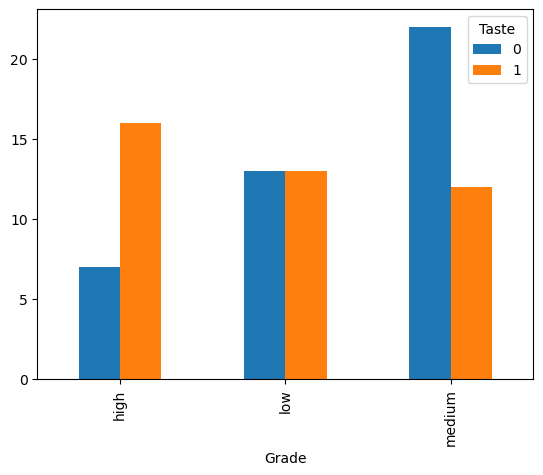

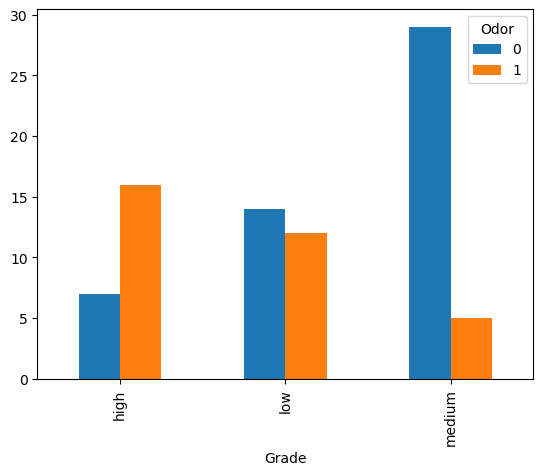

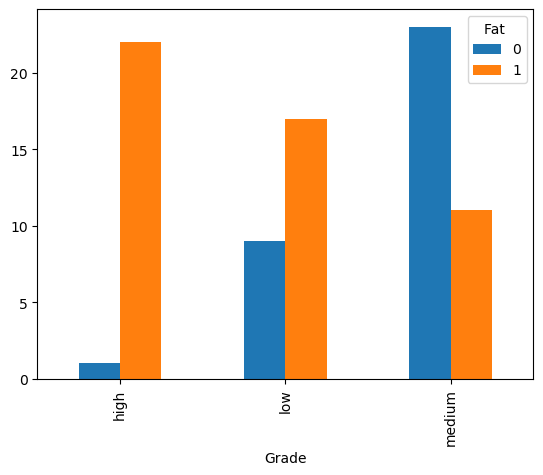

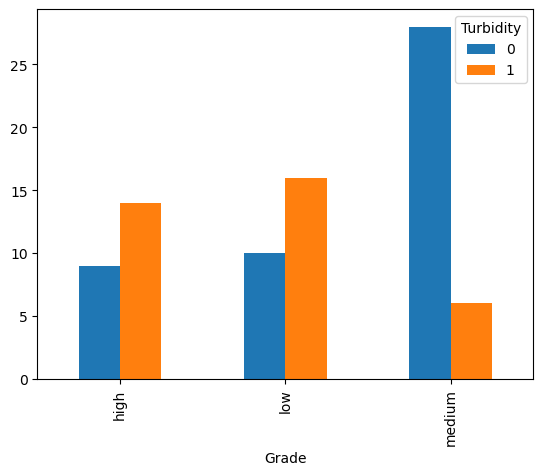

In [17]:
cols = ['Taste', 'Odor', 'Fat ', 'Turbidity' ]
for i in cols:
    pd.crosstab(Data.Grade,Data[i]).plot(kind = "bar")

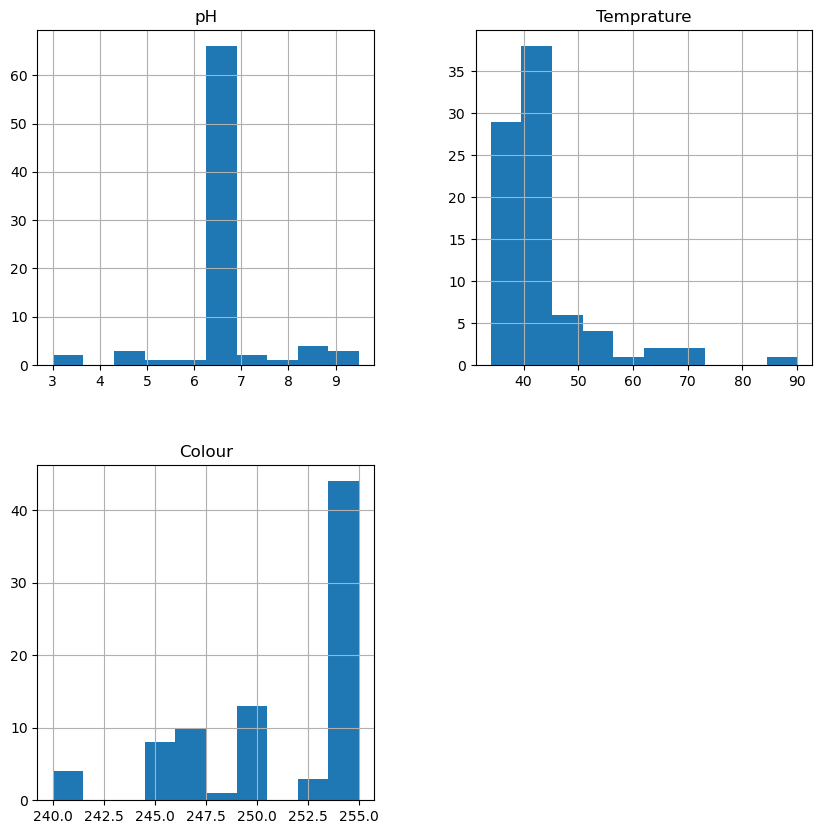

In [18]:
col2 = ['pH','Temprature','Colour']
Hist_plot = Data[col2].hist(figsize = (10,10))

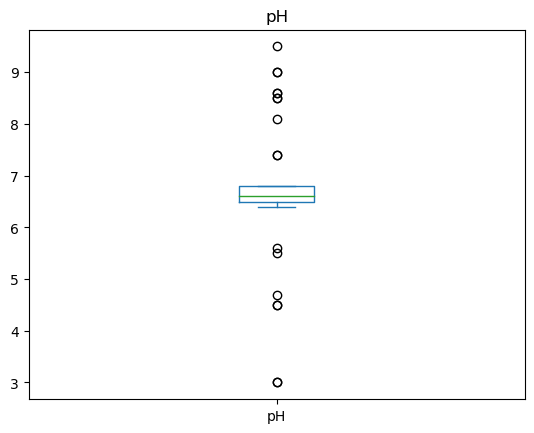

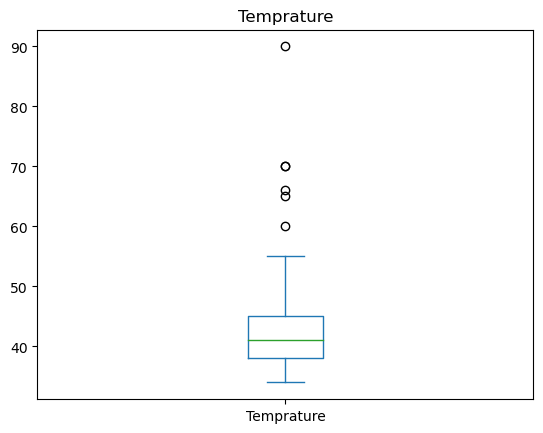

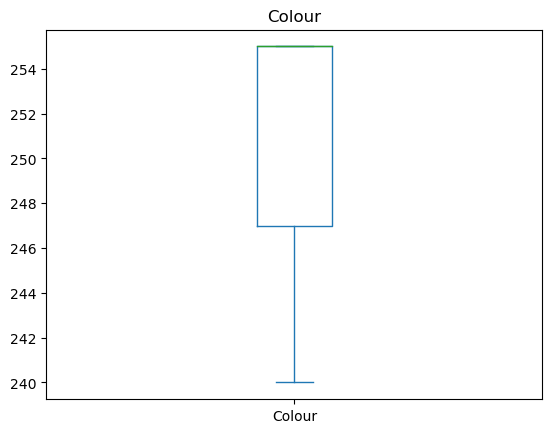

In [19]:
Col3 = ['pH', 'Temprature', 'Colour']

for i in Col3:
    Data[i].plot(kind = 'box')
    plt.title(i)
    plt.show()

In [20]:
Data

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium
...,...,...,...,...,...,...,...,...
930,6.6,38,0,1,1,1,255,high
942,6.6,45,1,0,0,1,255,medium
957,6.8,41,1,1,1,0,255,high
985,6.5,45,1,0,0,0,246,medium


In [21]:
Data['Grade'].unique()

array(['high', 'low', 'medium'], dtype=object)

In [22]:
Grade_order = {"low":0,"medium":1,"high":2}
Data["Grade"] = Data["Grade"].map(Grade_order)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5924\310655153.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data["Grade"] = Data["Grade"].map(Grade_order)


In [23]:
Data

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,2
1,6.6,36,0,1,0,1,253,2
2,8.5,70,1,1,1,1,246,0
3,9.5,34,1,1,0,1,255,0
4,6.6,37,0,0,0,0,255,1
...,...,...,...,...,...,...,...,...
930,6.6,38,0,1,1,1,255,2
942,6.6,45,1,0,0,1,255,1
957,6.8,41,1,1,1,0,255,2
985,6.5,45,1,0,0,0,246,1


In [24]:
correlation = Data.corr()
correlation

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
pH,1.000000,0.276312,0.004529,0.035984,-0.056062,0.065126,-0.090947,-0.025510
Temprature,0.276312,1.000000,0.016413,-0.002800,0.034489,0.150841,-0.030160,-0.488163
Taste,0.004529,0.016413,1.000000,-0.014831,0.359513,0.010545,-0.062734,0.140725
Odor,0.035984,-0.002800,-0.014831,1.000000,0.257576,0.381837,-0.072173,0.166563
Fat,-0.056062,0.034489,0.359513,0.257576,1.000000,0.164585,0.093818,0.218349
Turbidity,0.065126,0.150841,0.010545,0.381837,0.164585,1.000000,0.051957,-0.022135
Colour,-0.090947,-0.030160,-0.062734,-0.072173,0.093818,0.051957,1.000000,0.086056
Grade,-0.025510,-0.488163,0.140725,0.166563,0.218349,-0.022135,0.086056,1.000000


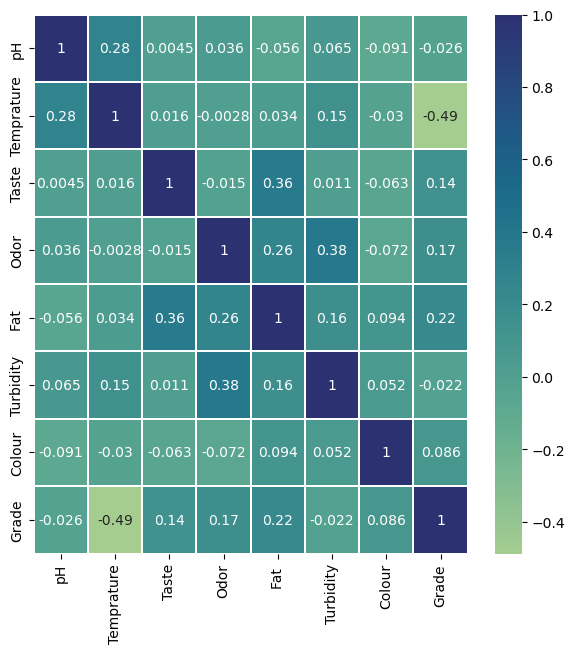

In [25]:
plt.figure(figsize=(7,7))
sns.heatmap(correlation,annot=True,cmap='crest',linewidths=0.2)
plt.show()

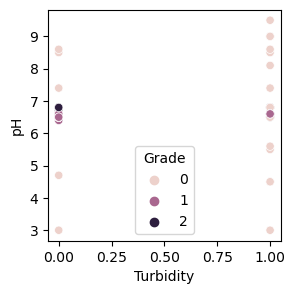

In [26]:
plt.figure(figsize=(3,3))
sns.scatterplot(x='Turbidity',y='pH',hue='Grade',data=Data)
plt.show()

# Model Building

In [27]:
#X- Fetuses _Independent Variables and y-Labels_Dependent Variables 
x = Data.drop('Grade',axis = 1 )
y = Data.Grade

print (x.head())

print ('Labels')
print (y.head())

    pH  Temprature  Taste  Odor  Fat   Turbidity  Colour
0  6.6          35      1     0     1          0     254
1  6.6          36      0     1     0          1     253
2  8.5          70      1     1     1          1     246
3  9.5          34      1     1     0          1     255
4  6.6          37      0     0     0          0     255
Labels
0    2
1    2
2    0
3    0
4    1
Name: Grade, dtype: int64


In [28]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
Data['Grade']= label_encoder.fit_transform(Data['Grade'])
Data['Grade'].unique()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5924\3762648069.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['Grade']= label_encoder.fit_transform(Data['Grade'])


array([2, 0, 1], dtype=int64)

# 1.Scaling the data

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score

# create a scalar object
scaler = StandardScaler()

# fit the scalar to the data and transform the data
x_scaled = scaler.fit_transform(x)

## 2. Splitting the data in training and testing

In [30]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.4, random_state=42)

# trainng & testing size
print("Training Size", x_train.shape)
print("Testing Size",x_test.shape)

Training Size (49, 7)
Testing Size (34, 7)


# 3.Model Application

# Now will try to build with various model like linear regression, Decision Tree, Randomforest etc

# Model Development


In [31]:
#importing the model
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier



# Model Evaluation Matrix

In [32]:
#importing the model Evaluation Matrix:

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

# DECISION TREE

In [33]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [34]:
y_pred=model.predict(x_test)
y_pred.shape

(34,)

In [35]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.8235294117647058


DecisionTreeClassifier :
Accuracy: 0.8235294117647058
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80        12
           1       0.94      0.88      0.91        17
           2       0.50      1.00      0.67         5

    accuracy                           0.82        34
   macro avg       0.81      0.85      0.79        34
weighted avg       0.90      0.82      0.83        34



Text(0.5, 1.0, 'Confusion Matrix- DecisionTreeClassifier')

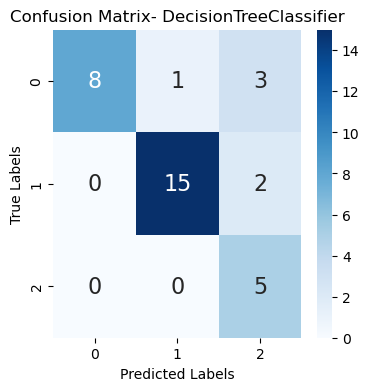

In [36]:
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)


# Evaluate the model
print("\nDecisionTreeClassifier :")
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Create heatmap for model
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={'size': 16})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix- DecisionTreeClassifier')

# SUPPORT VECTOR MACHINE

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score
sc=StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_train)

In [38]:
from sklearn.svm import SVC
classifier = SVC(kernel='linear', random_state=0)  
classifier.fit(x_train, y_train)  

SVC(kernel='linear', random_state=0)

In [39]:
y_predict= classifier.predict(x_test)
score=accuracy_score(y_pred,y_test)
print(score)

0.8235294117647058



SVC :
Accuracy: 0.8235294117647058
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80        12
           1       0.94      0.88      0.91        17
           2       0.50      1.00      0.67         5

    accuracy                           0.82        34
   macro avg       0.81      0.85      0.79        34
weighted avg       0.90      0.82      0.83        34



Text(0.5, 1.0, 'Confusion Matrix- SVC')

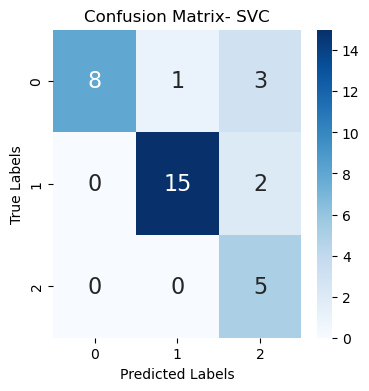

In [40]:
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)


# Evaluate the model
print("\nSVC :")
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Create heatmap for model
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={'size': 16})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix- SVC')

In [41]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=1.0,random_state=2)
model.fit(x_train,y_train)

LogisticRegression(random_state=2)

In [42]:
y_proba = model.predict_proba(x_test)[:,1]

In [43]:
from sklearn.metrics import confusion_matrix ,accuracy_score,precision_score,f1_score,recall_score,roc_auc_score,roc_curve
from sklearn.metrics import classification_report


Logistic Regression :
Accuracy: 0.8235294117647058
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80        12
           1       0.94      0.88      0.91        17
           2       0.50      1.00      0.67         5

    accuracy                           0.82        34
   macro avg       0.81      0.85      0.79        34
weighted avg       0.90      0.82      0.83        34



Text(0.5, 1.0, 'Confusion Matrix- Logistic\xa0Regression')

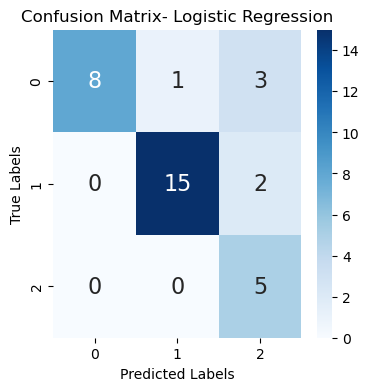

In [44]:
# Create confusion matrix
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)


# Evaluate the model
print("\nLogistic Regression :")
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Create heatmap for model
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={'size': 16})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix- Logistic Regression')